In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Let's Load the dataset
data = pd.read_csv(r"Z:\python classes\USL\USL Case study\Country-data.csv")
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [8]:
# describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


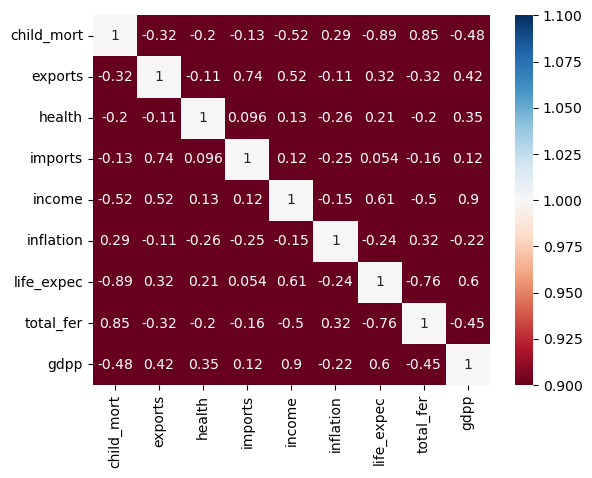

In [9]:
# correlation heatmap
sns.heatmap(data.corr(numeric_only = True),annot=True,vmin =1,cmap='RdBu')
plt.show()

In [10]:
# Converting Country as index before doing visualization
data.set_index('country',inplace = True)


In [11]:
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


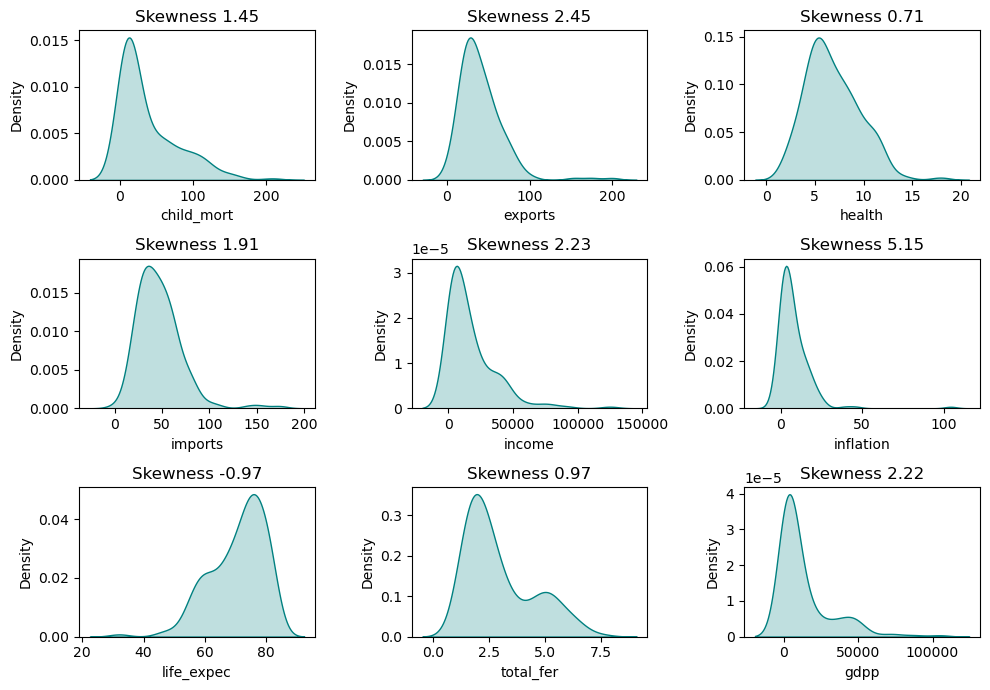

In [12]:
## Univariate Analysis
plt.figure(figsize=[10,7])
t=1 
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='teal')
    plt.title(f'Skewness {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

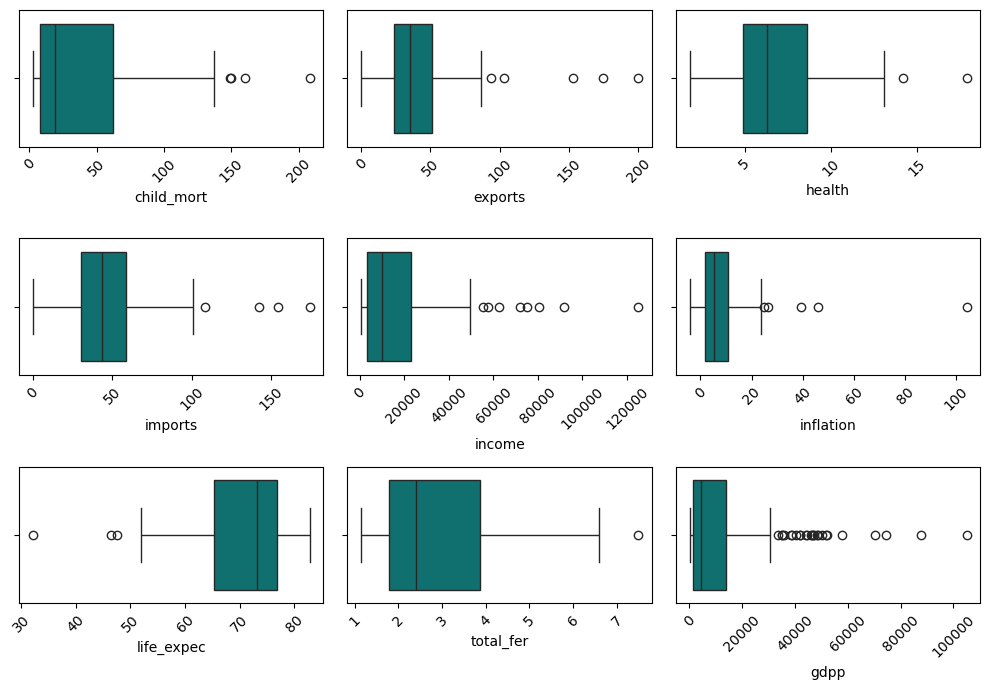

In [17]:
# for looking outliers 
plt.figure(figsize=[10,7])
t=1 
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='teal')
    t+=1
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

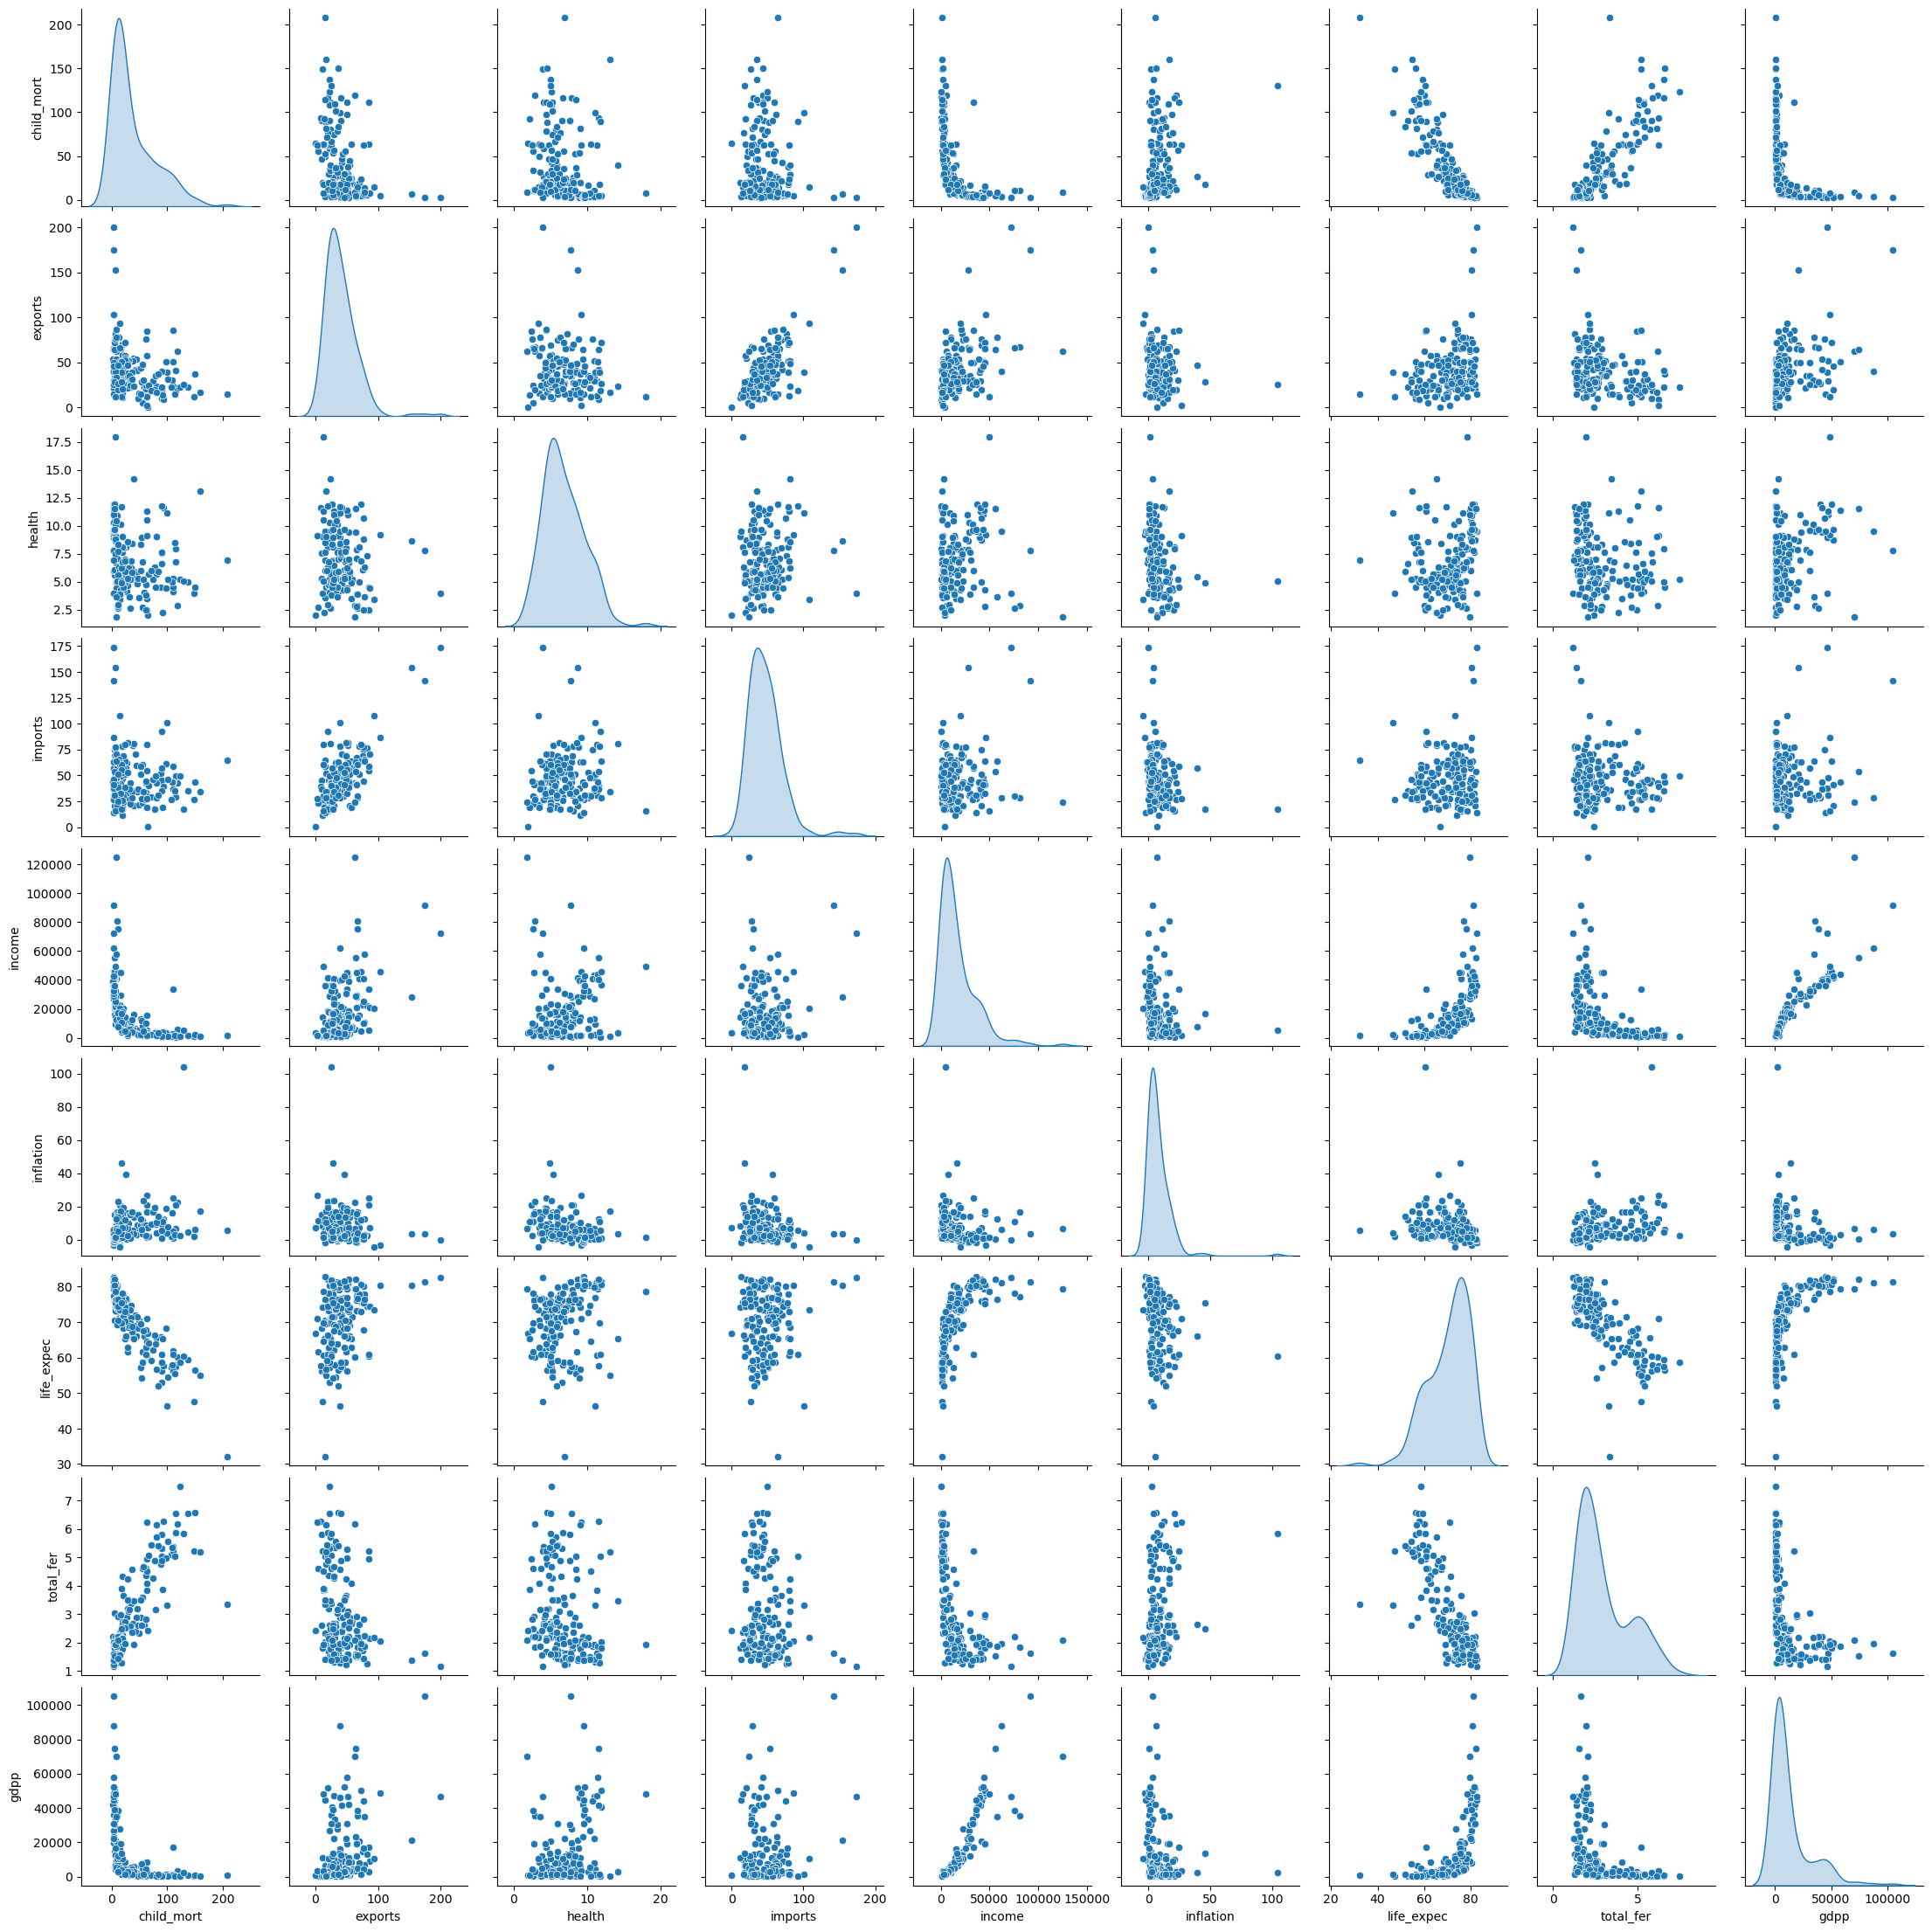

In [15]:
# Bivariate Analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

In [18]:
# Preprocessing

In [ ]:
# looking for  missing values
data.isnull().sum()
# No missing values present in this data

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [20]:
# Treating the outliers we do capping
# In order to cap only the extreme one's let's keep whisker length = 2.5
for i in data.columns:
    q3,q1 = data[i].quantile([0.75,0.25])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr , q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

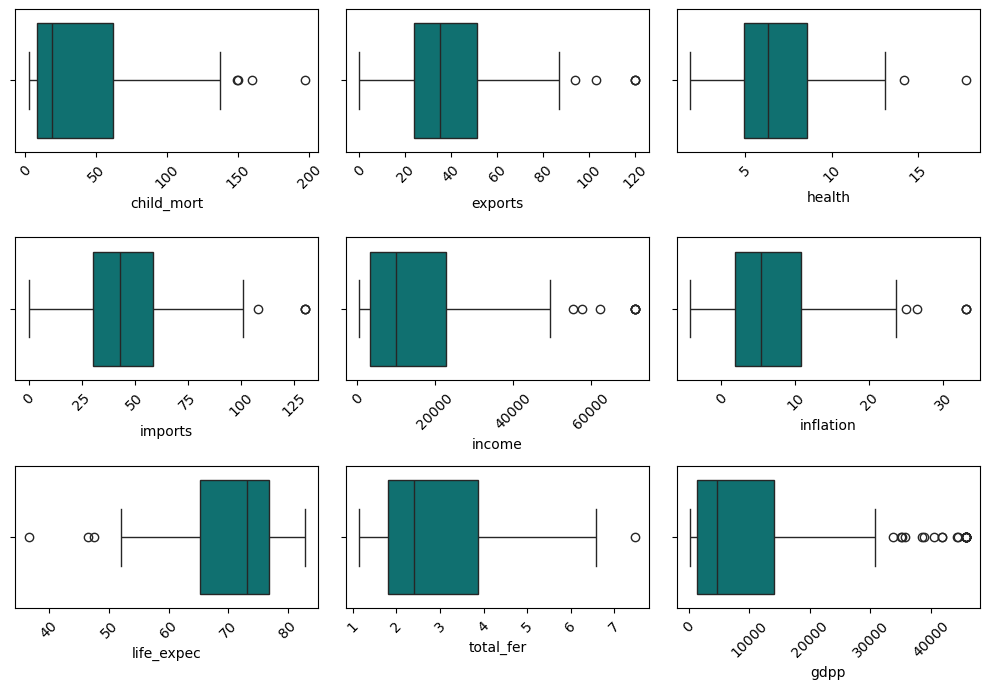

In [ ]:
plt.figure(figsize=[10,7])
t=1 
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='teal')
    t+=1
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# we have treated most of the outliers in the data

In [22]:
# Applying PCA of the data before proceed with clustering . Just to have better visualization and for better clustering
# In PCA we need to pass standardise data
# Importing functions from Libraries for it
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [28]:
# Let's create an instance of Scaler
scaler = StandardScaler()

# Let's create an instance for pca
pca = PCA(n_components = 5, random_state =2)

# Creating Pipeline for the above 2 processess
pipeline = Pipeline([('Scale', scaler),('PCA',pca)])

In [29]:
pipeline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [30]:
pca.explained_variance_

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658])

In [31]:
pca.explained_variance_ratio_.cumsum()
# here we reduce 9 dimension data(columns) and take 5 dimension(col) because in 5 columns we have 95% of information we get
# At n_components = 5 we are able to get 95% of information

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [35]:
# .tranform returns the array so we are converting it into dataframe
final_data = pipeline.transform(data)
final_data = pd.DataFrame(final_data,columns =['PC1','PC2','PC3','PC4','PC5'],index = data.index)
final_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311
...,...,...,...,...,...
Vanuatu,-0.828141,0.812072,0.314558,-0.715821,-0.527346
Venezuela,-0.572007,-1.456583,-3.029355,0.232195,1.994067
Vietnam,0.391400,1.868710,-0.234175,-0.909466,1.304821


In [37]:
# K-Means Clustering

In [40]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [51]:
# Step1 : identify the value of k
# for that we do KElbw Visualizer
kelbow = KElbowVisualizer(estimator = KMeans(random_state=2),k=10)

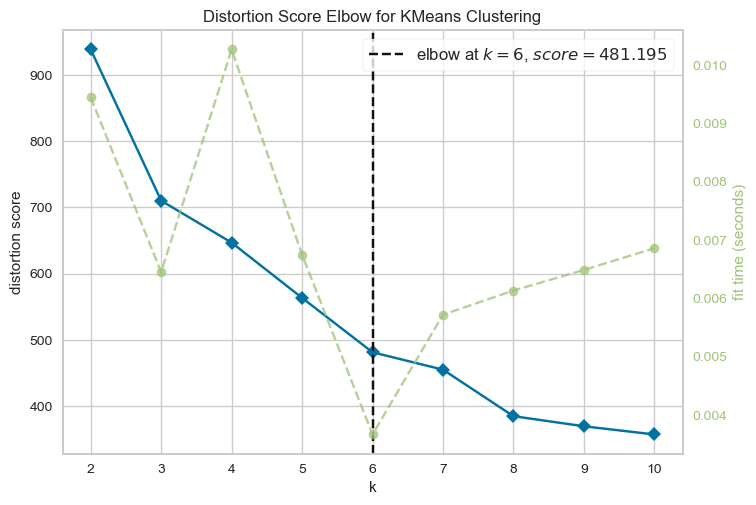

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kelbow.fit(final_data)
kelbow.show()

In [53]:
# Although the above plot marks the elbow at k=6 but we can see there is a significant drop in distortion score from k=2 to k=3 
# as we increase the number of clusters it might become overfitted so
# we use silhouette visualizer to  identify what would be the correct or more generalized value of k

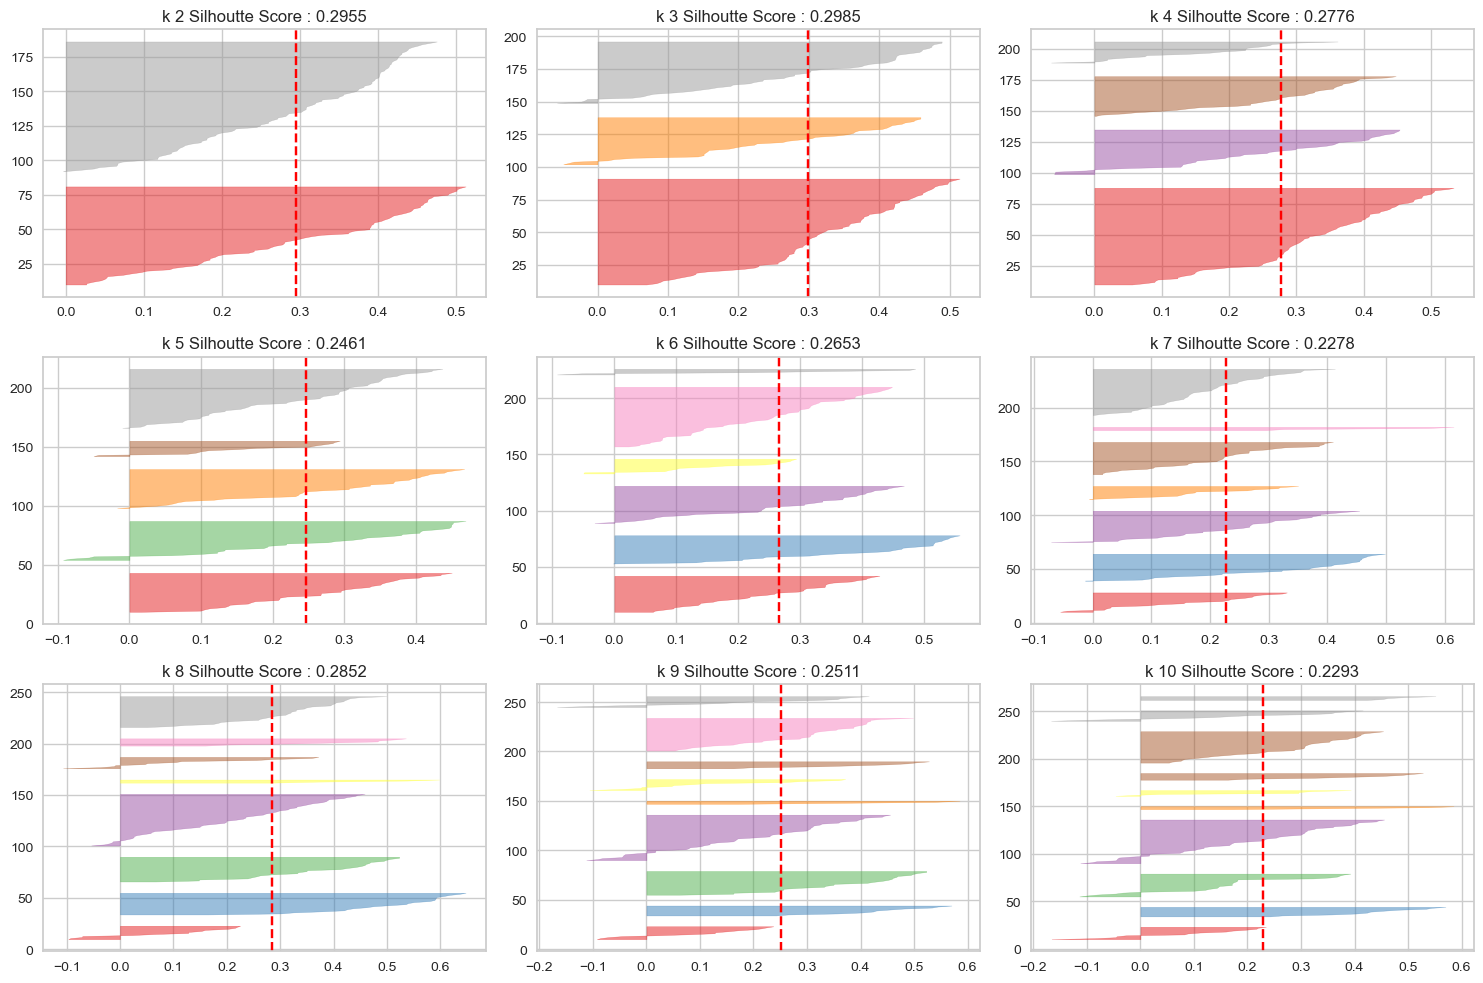

In [56]:
# Creating Silhouette plot
t=1
plt.figure(figsize =[15,10])
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k {i} Silhoutte Score : {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

In [57]:
# Interpretation : After analysing k-elbow plot and silhouette visualizer we choose k=3 although there are few datapoints that have been 
# misclassified but we see there is no drop in silhouette score and there is good enough data in every cluster 
# Also from k-elbow plot significant drop in wcss or distortion score was observed from k=2  to k=3 .

In [59]:
# fitting a model
final_kmeans = KMeans(n_clusters=3,random_state = 2)

In [60]:
labels = final_kmeans.fit_predict(final_data)

In [62]:
# Now we check the sillhouette score
print('Sillhouette Score : ',silhouette_score(final_data,labels))

Sillhouette Score :  0.29845782348296623


In [64]:
# putting these labels on PCA data

final_data['Labels'] = labels
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0


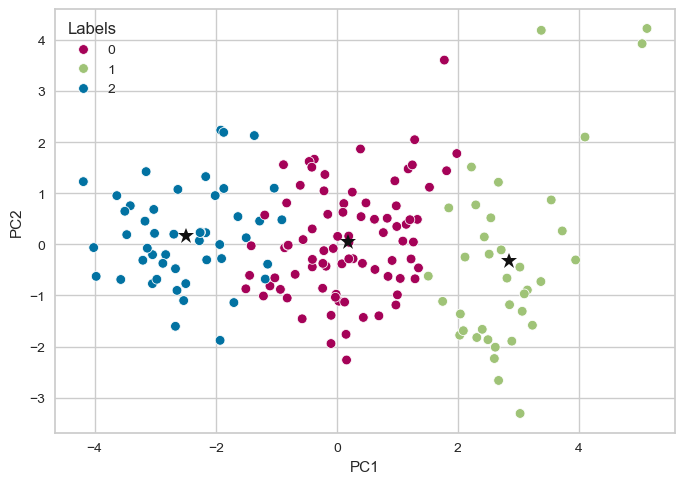

In [72]:
# Visualizing the clusters
# In order to get the best visualization we use PC1 and PC2 as they have max variance

centroids = final_kmeans.cluster_centers_
centroids

sns.scatterplot(data=final_data,x='PC1',y='PC2',hue='Labels',palette = ['m','g','b'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*', ms = 12, color='k')
plt.show()

In [73]:
## Business Interpretation

In [74]:
# for having business understanding put the labels on the original dataset
data['Label'] = labels
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0


In [75]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


In [76]:
# Here according to data we can see that the countries who alloted label 2 are under developed countries and 
# in label 1 the countries are developed countries and the cluster 0 countries are developing countries because they
# are doing avg in most of the factor but struggling in economic factors like gdpp, income,expenditure on health.


In [78]:
# Renaming labels 
data['Label'] = data['Label'].map({0:'Developing',1:'Developed',2:'Under Developed'})

In [79]:
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Under Developed
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing


In [80]:
# countries in developed stage
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [81]:
# countries in developing stage
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [82]:
# countries in Under developed stage
data[data['Label']=='Under Developed'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

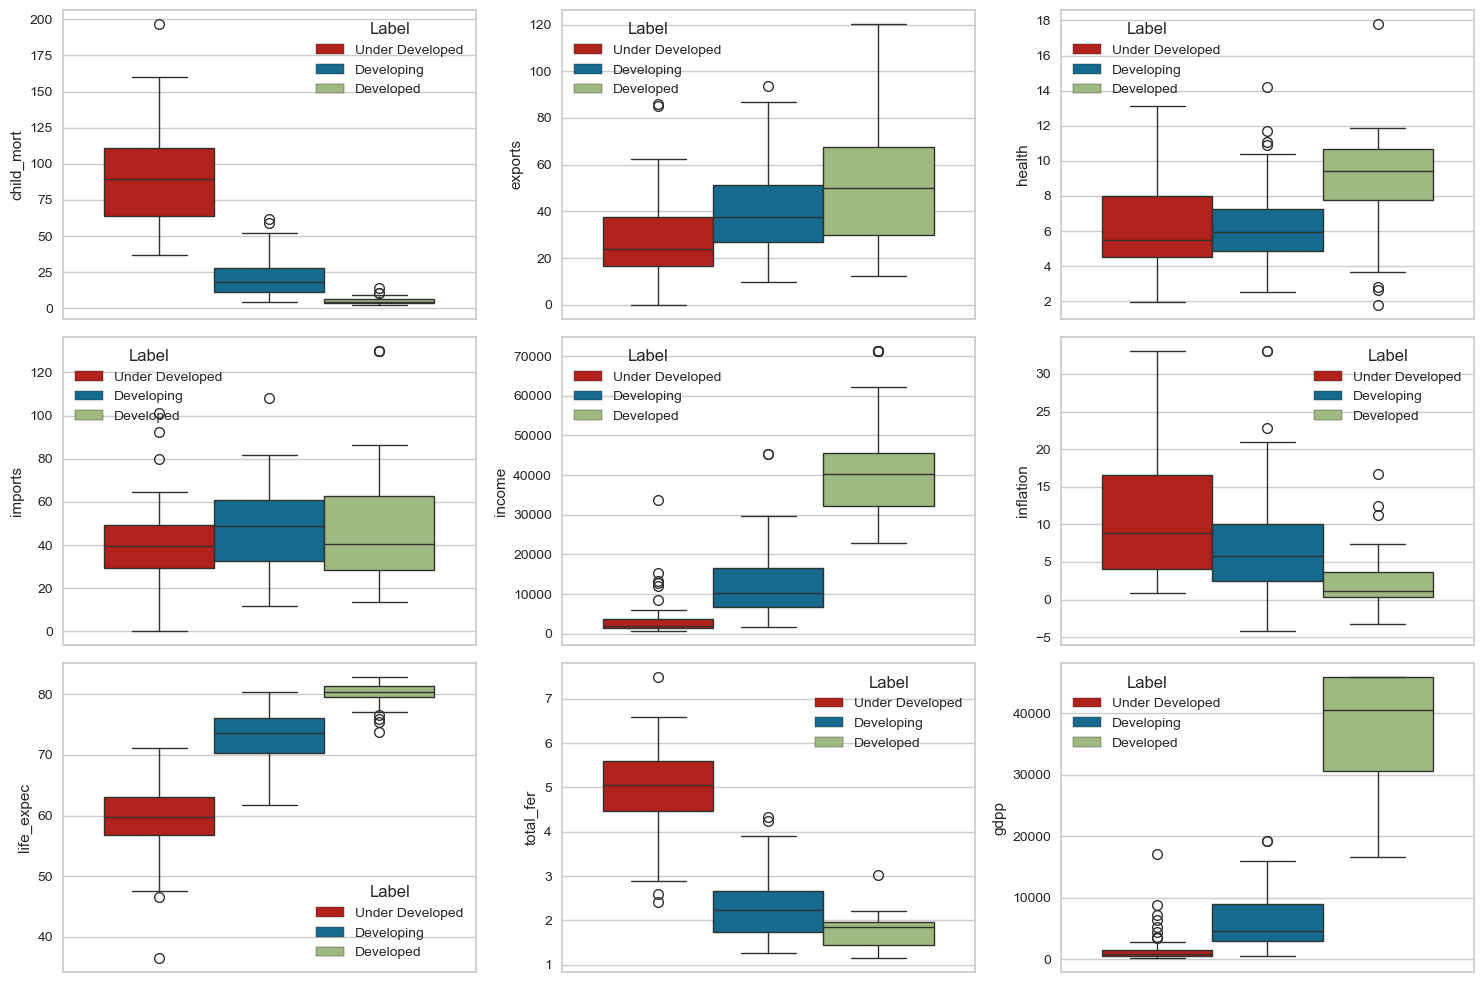

In [85]:
plt.figure(figsize=[15,10])
t=1 
for i in data.columns:
    if i!='Label':
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,hue='Label',color='teal',palette=['r','b','g'])
        t+=1
        
plt.tight_layout()
plt.show()

In [86]:
# for creating map
import plotly.express as px # advance visualization chart library

In [88]:
# creating world map
px.choropleth(data_frame = data,locationmode = 'country names',locations = data.index,color='Label',color_discrete_map = {'Under Developed':'red','Developing':'blue','Developed':'green'})

In [89]:
## Deployment

In [95]:
input_data = data.iloc[0,:-1].values
input_data

array([np.float64(90.2), np.float64(10.0), np.float64(7.58),
       np.float64(44.9), np.float64(1610.0), np.float64(9.44),
       np.float64(56.2), np.float64(5.82), np.float64(553.0)],
      dtype=object)

In [96]:
final_input_data = pipeline.transform([input_data])
final_input_data

array([[-3.04363665, -0.20115529,  0.95132235,  0.79344472, -0.00680001]])

In [ ]:
final_kmeans.predict(final_input_data)[0]
# This shows the data is underdeveloped

np.int32(2)

In [98]:
# for doing prediction we use joblib file 
import joblib 

In [99]:
# create joblib file of pipeline
with open('pipeline.joblib','wb') as file: # here wb is write binary and pipeline.joblib is file name
    joblib.dump(pipeline,file)

In [ ]:
# create joblib file of model
with open('model.joblib','wb') as file: # here wb is write binary and model.joblib is file name
    joblib.dump(final_kmeans,file)